In [1251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1252]:
dataset = pd.read_csv('loan_data.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [1253]:
dataset.info()
dataset.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583        

In [1254]:
dataset.shape

(381, 13)

In [1255]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1256]:
dataset.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [1257]:
dataset = dataset.dropna()
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1258]:
dataset.duplicated().sum()

0

In [1259]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1260]:
sns.set(style='darkgrid')

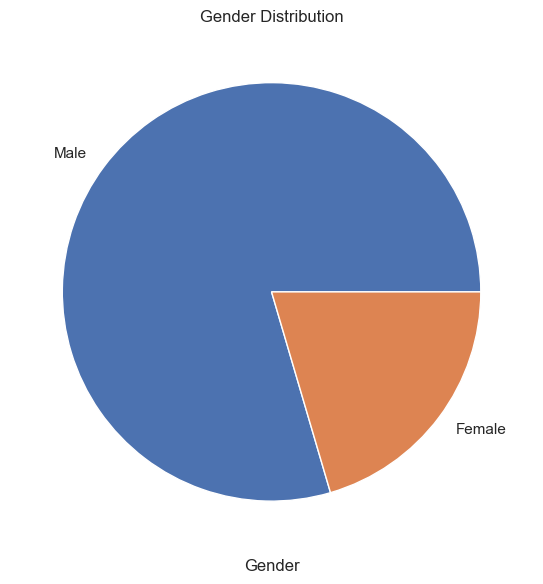

In [1261]:
dataset['Gender'].value_counts().plot(kind='pie', figsize=(10,6), color=['blue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [1262]:
dataset['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

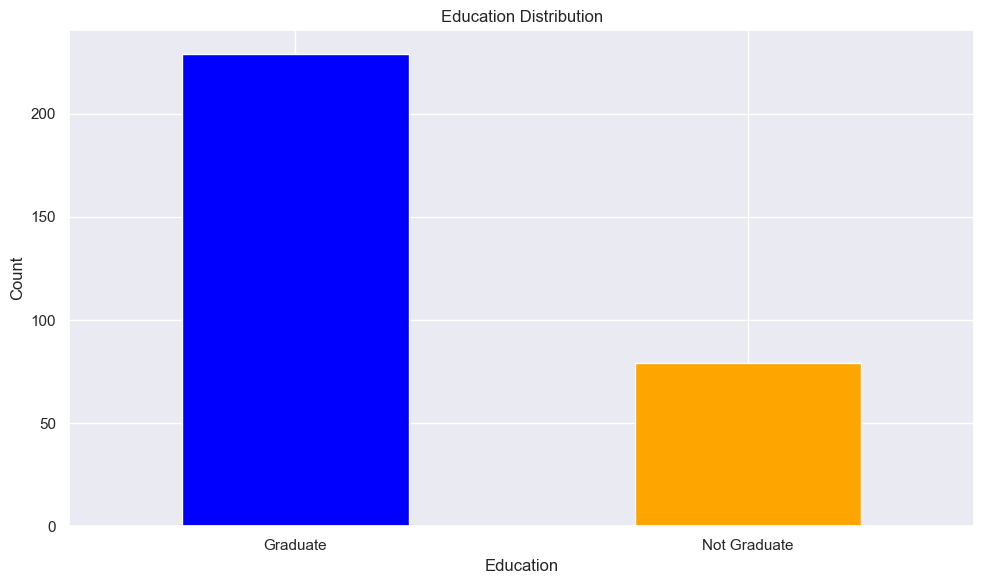

In [1263]:
dataset['Education'].value_counts().plot(kind='bar', figsize=(10,6), color=['blue', 'orange'])
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

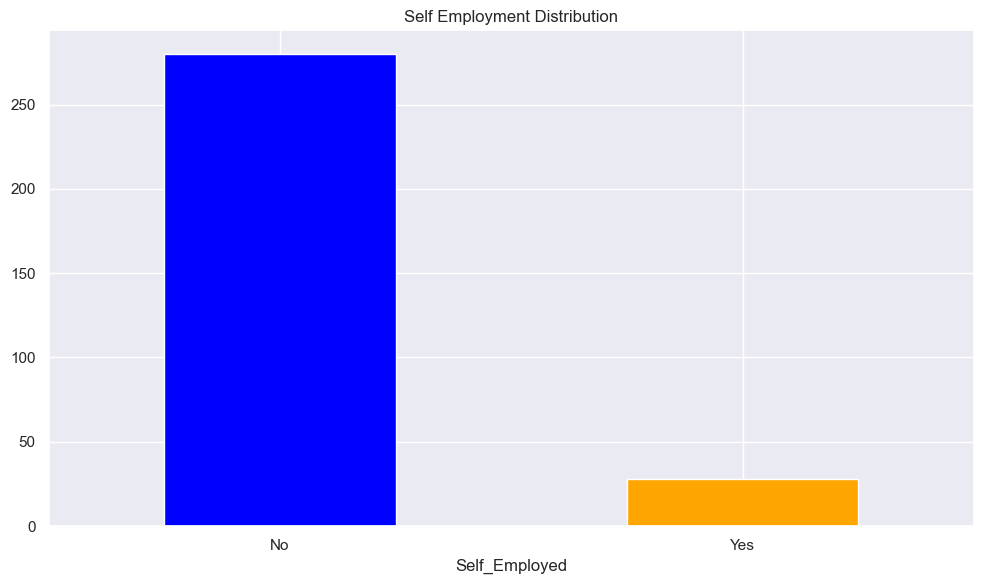

In [1264]:
dataset['Self_Employed'].value_counts().plot(kind='bar', figsize=(10,6), color=['blue', 'orange'])
plt.title('Self Employment Distribution')
plt.xlabel('Self_Employed')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [1265]:
dataset['Property_Area'].value_counts()

Property_Area
Semiurban    123
Urban         99
Rural         86
Name: count, dtype: int64

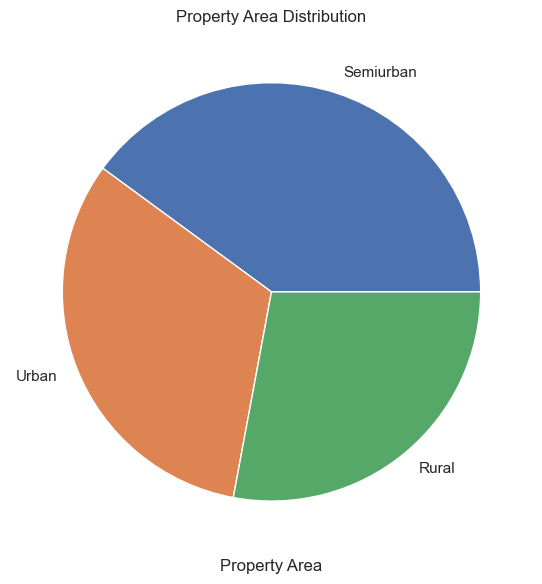

In [1266]:
dataset['Property_Area'].value_counts().plot(kind='pie', figsize=(10,6), color=['blue', 'orange'])
plt.title('Property Area Distribution')
plt.xlabel('Property Area')
plt.ylabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

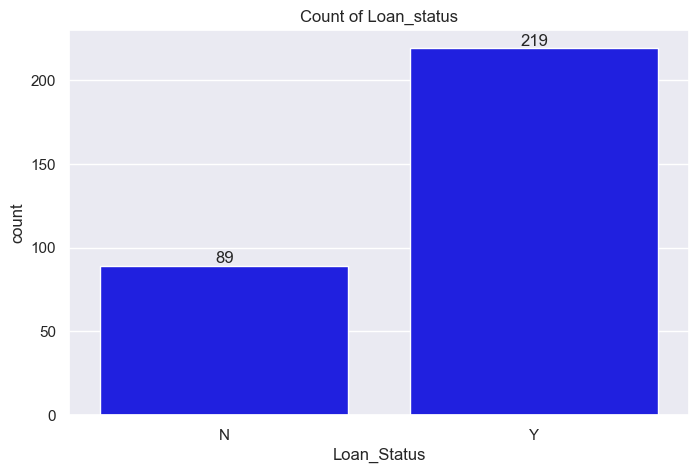

In [1267]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=dataset, x='Loan_Status', color='blue')  

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.title("Count of Loan_status")
plt.show()


In [1268]:
dataset.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              166
              N               63
Not Graduate  Y               53
              N               26
Name: count, dtype: int64

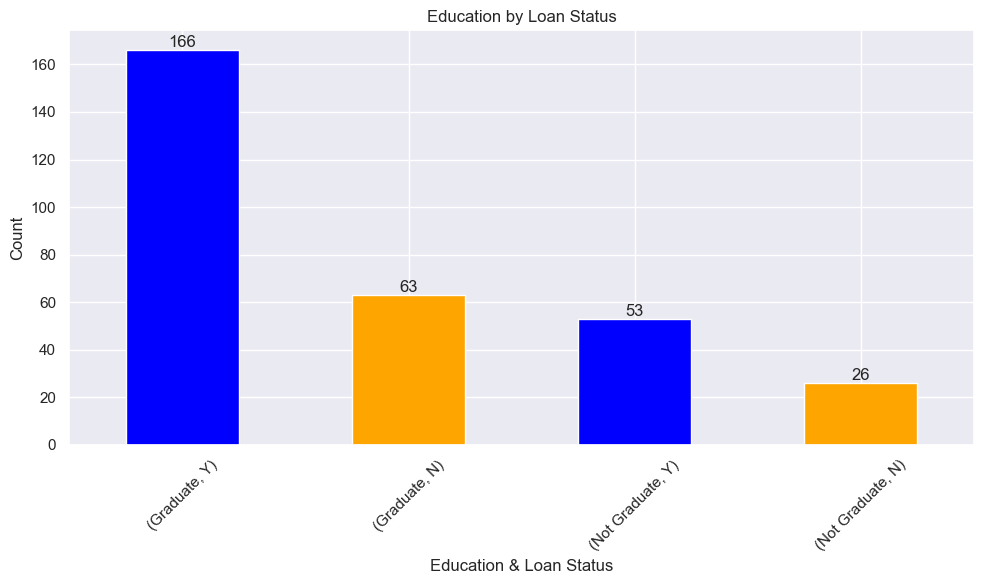

In [1269]:
ax = dataset.groupby('Education')['Loan_Status'].value_counts().plot(
    kind='bar', figsize=(10,6), color=['blue','orange'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Education by Loan Status')
plt.xlabel('Education & Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

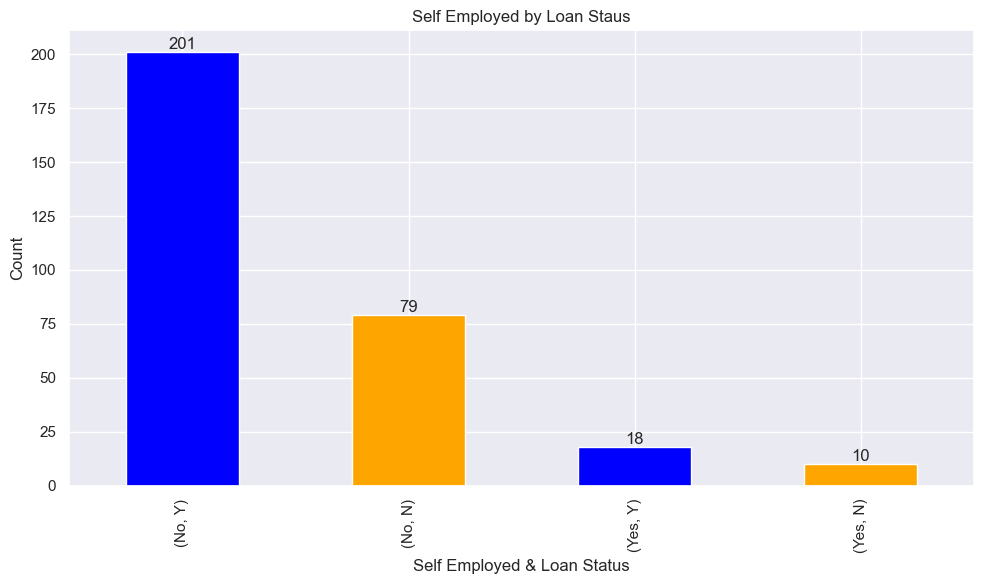

In [1270]:
ax = dataset.groupby('Self_Employed')['Loan_Status'].value_counts().plot(kind='bar', figsize=(10,6), 
        title='Self Employed by Loan Staus', xlabel='Self Employed & Loan Status', ylabel='Count', 
        color=['blue', 'orange'])

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

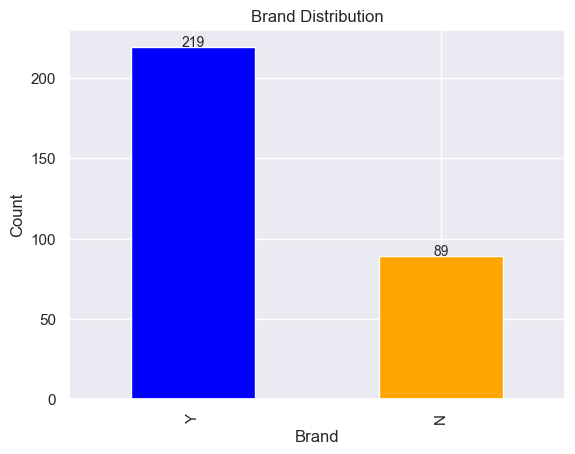

In [1271]:
import matplotlib.pyplot as plt

counts = dataset['Loan_Status'].value_counts()

ax = counts.plot(kind='bar', color=['blue', 'orange'])
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

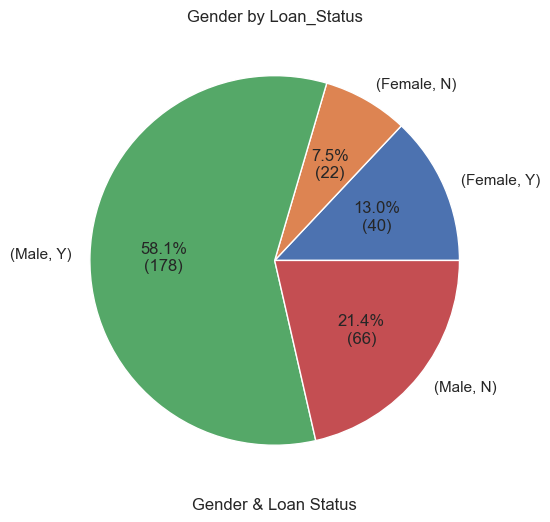

In [1272]:
dataset.groupby('Gender')['Loan_Status'].value_counts().plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})',  # shows % and counts
    figsize=(6,6)
)
plt.title('Gender by Loan_Status')
plt.xlabel('Gender & Loan Status')
plt.ylabel('')
plt.xticks(rotation=0)
plt.show()

In [1273]:
dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [1274]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in range (len(dataset.columns)):
    if dataset.dtypes[i] == 'object':
        dataset[dataset.columns[i]] = encoder.fit_transform(dataset[dataset.columns[i]])

dataset.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [1275]:
corr = dataset.corr()
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028653,-0.038510,0.104314,0.000544,0.001651,0.010992,0.068017,0.009066,-0.066259,-0.088136,-0.217086,-0.014541
Gender,-0.028653,1.000000,0.342512,0.240565,0.131954,-0.007636,0.018276,0.107629,0.107087,-0.107448,0.063704,0.038059,0.085155
Married,-0.038510,0.342512,1.000000,0.402679,0.023510,-0.018867,-0.042202,0.059177,0.177552,-0.152815,0.056854,0.053039,0.123695
Dependents,0.104314,0.240565,0.402679,1.000000,0.107501,0.056730,0.152565,-0.076818,0.080693,-0.115610,0.023416,0.034471,0.031610
Education,0.000544,0.131954,0.023510,0.107501,1.000000,0.021160,-0.040449,-0.052910,-0.041882,-0.141566,0.011413,-0.070464,-0.052029
Self_Employed,0.001651,-0.007636,-0.018867,0.056730,0.021160,1.000000,0.231252,-0.065120,0.012915,-0.051897,0.002907,-0.075624,-0.047567
ApplicantIncome,0.010992,0.018276,-0.042202,0.152565,-0.040449,0.231252,1.000000,-0.243677,0.267628,-0.099571,0.030307,-0.059283,0.033927
CoapplicantIncome,0.068017,0.107629,0.059177,-0.076818,-0.052910,-0.065120,-0.243677,1.000000,0.123028,-0.004158,0.012715,0.030139,-0.001546
LoanAmount,0.009066,0.107087,0.177552,0.080693,-0.041882,0.012915,0.267628,0.123028,1.000000,0.135069,-0.043853,-0.184085,0.053104
Loan_Amount_Term,-0.066259,-0.107448,-0.152815,-0.115610,-0.141566,-0.051897,-0.099571,-0.004158,0.135069,1.000000,0.015269,-0.101685,-0.009547


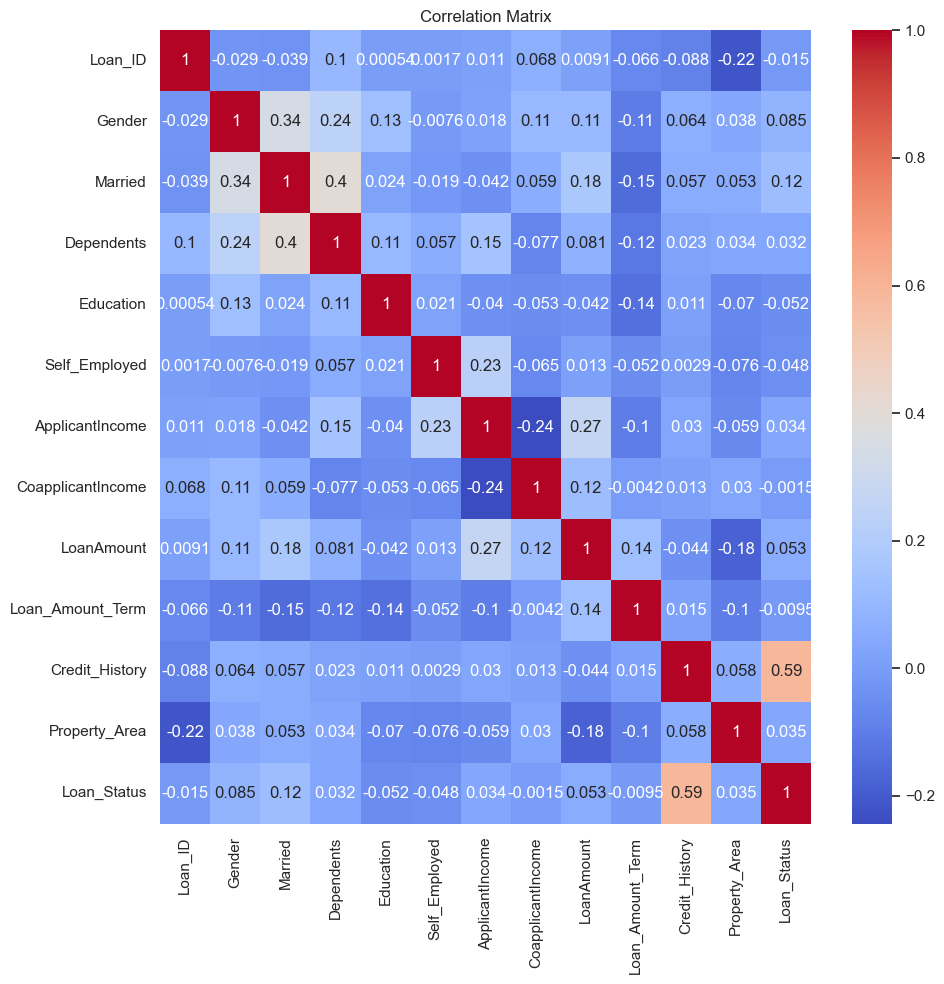

In [1276]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1277]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1278]:
dataset = dataset.drop(['Loan_ID', 'Gender','Dependents', 'Loan_Amount_Term', 'Property_Area'], axis = 1)
dataset.head(2)

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,1,0,0,4583,1508.0,128.0,1.0,0
1,1,0,1,3000,0.0,66.0,1.0,1


In [1279]:
x = dataset.drop(['Loan_Status'], axis = 1)
y = dataset['Loan_Status']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1280]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 80.65%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62

Confusion Matrix:
[[10 10]
 [ 2 40]]


In [1281]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_y_pred))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 79.03%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        20
           1       0.81      0.90      0.85        42

    accuracy                           0.79        62
   macro avg       0.77      0.73      0.74        62
weighted avg       0.78      0.79      0.78        62

Random Forest Confusion Matrix:
[[11  9]
 [ 4 38]]


In [1282]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Decision Tree Accuracy: {dt_accuracy * 100:.2f}%')
print('Decision Tree Classification Report:')
print(classification_report(y_test, dt_y_pred))
print('Decision Tree Confusion Matrix:')
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 72.58%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.79      0.81      0.80        42

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.72      0.73      0.72        62

Decision Tree Confusion Matrix:
[[11  9]
 [ 8 34]]


In [1283]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')
print('SVM Classification Report:')
print(classification_report(y_test, svm_y_pred))
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, svm_y_pred))

SVM Accuracy: 80.65%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62

SVM Confusion Matrix:
[[10 10]
 [ 2 40]]


In [1284]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print('KNN Classification Report:')
print(classification_report(y_test, knn_y_pred))
print('KNN Confusion Matrix:')
print(confusion_matrix(y_test, knn_y_pred))

KNN Accuracy: 72.58%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.51        20
           1       0.77      0.86      0.81        42

    accuracy                           0.73        62
   macro avg       0.68      0.65      0.66        62
weighted avg       0.71      0.73      0.71        62

KNN Confusion Matrix:
[[ 9 11]
 [ 6 36]]


In [1285]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_y_pred = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%')
print('Naive Bayes Classification Report:')
print(classification_report(y_test, nb_y_pred))
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, nb_y_pred))

Naive Bayes Accuracy: 80.65%
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.80      0.95      0.87        42

    accuracy                           0.81        62
   macro avg       0.82      0.73      0.75        62
weighted avg       0.81      0.81      0.79        62

Naive Bayes Confusion Matrix:
[[10 10]
 [ 2 40]]


In [1286]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': np.logspace(-12, -2, 50),
    'priors' : [
        None,
        [0.5, 0.5],
        [0.7, 0.7],
        [0.9, 0.1]
    ]
}

gridgnb = GridSearchCV(GaussianNB(), param_grid, cv=5)
gridgnb.fit(x_train, y_train)
gridgnb.fit(x_test, y_test)

y_pred = gridgnb.predict(x_test)
accuracy_gnb = accuracy_score(y_test, y_pred)
print(f'Best Params: {gridgnb.best_params_}')
print(f'GNB Accuracy: {accuracy_gnb * 100:.2f}%')

Best Params: {'priors': None, 'var_smoothing': 1e-12}
GNB Accuracy: 83.87%


In [1287]:
nb_y_pred = nb_model.predict(x_test)
print(np.concatenate((nb_y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]]


In [1290]:
x.sample(5)

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
223,1,0,0,3875,0.000000,67.0,1.0
358,1,0,0,3166,2064.000000,104.0,0.0
39,0,0,0,4230,0.000000,112.0,1.0
176,1,0,0,2301,985.799988,78.0,1.0
144,1,0,0,3155,1779.000000,140.0,1.0


In [1292]:
y.iloc[144]

1

In [1294]:
user_input = [[1, 0, 0, 3155, 1779, 140, 1]]
results = nb_model.predict(user_input)[0]
print(f"Prediction: {results}")

Prediction: 1
